In [1]:
from bike_path import RouteFinder
import time
import numpy as np

# Stosunek zasięgu mapy, a długosci trasy

Poniżej znajduje się proponowany stosunek trasy. Jeśli wzięlibyśmy zasieg równy _R_, to długość trasy po obrzeżu wynosiłaby _2πR_. Zakładając dal bezpieczeństwa, że trasa będzie miała długość połowy obwodu okręgu zasięgu o promieniu _R_, możemy dla ułatwienia przybliżyć, że _R_ powinien wynosić _l/π_, zatem stosunek _R:l_ (zasięgu do długości trasy) możemy oszacować jako _1:3_. 

<img title="Stosunek długości trasy i zasięgu mapy" src="zasieg_trasy.png" alt="Stosunek długości trasy i zasięgu mapy" style="height: 324px; width:576px;"/>

### Wyniki dla mniejszych odległości

In [2]:
def mean_times_makeroute(rf, lb, ub, intervals=10):
    mean_time = 0.0
    mape = 0.0  # Mean absolute percantage error
    step = (ub - lb) / intervals
    for i in range(intervals+1):
        start_t = time.time()
        length = lb + i * step
        p, l = rf.make_route(length)
        end_t = time.time()
        mean_time += (end_t-start_t)
        mae = np.abs(length - l)
        mape += mae / length
    mean_time /= (intervals+1)
    mape /= (intervals+1) # percentage
    print(f"Elapsed mean time ({(intervals+1)} runs) for finding route was: {mean_time:.2f}s. MAPE: {mape*100.0:.2f}%")
    # return mean_time

In [3]:
dist = 2000

start_t = time.time()
rf = RouteFinder(
    pos=(50.291100737108025, 18.680043199195698),
    dist = dist,
    bike_type = 'Recumbent'
)
end_t = time.time()
print(f"Elapsed time for loading map of dist: {dist} was: {end_t-start_t:.2f}s")

a = rf.nearest_nodes(pos=(50.291100737108025, 18.680043199195698))

Elapsed time for loading map of dist: 2000 was: 2.98s


In [6]:
mean_times_makeroute(rf, 2000, 6000)

Elapsed mean time (11 runs) for finding route was: 0.41s. MAPE: 3.24%


Total distance: 1961.6110000000003


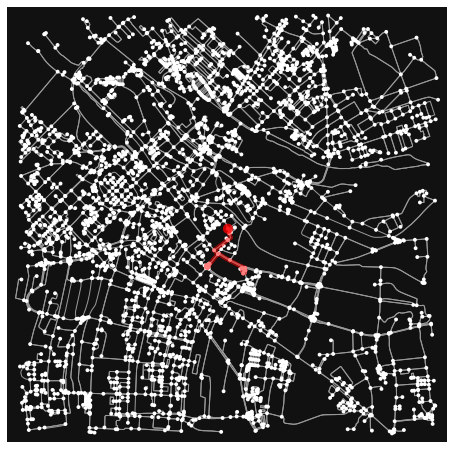

Total distance: 3875.0190000000002


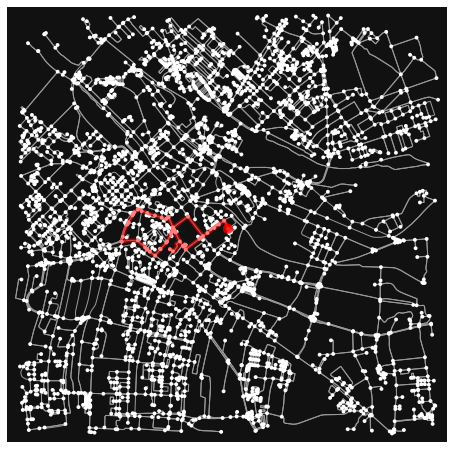

Total distance: 6133.752000000002


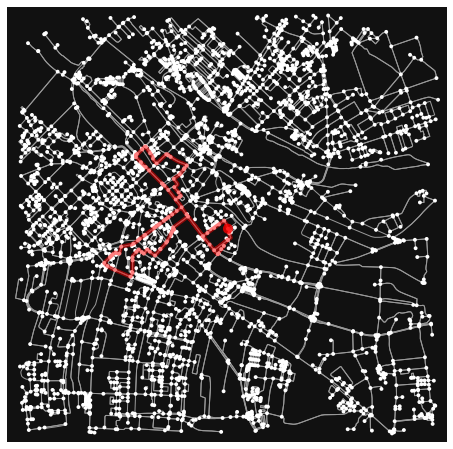

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
length = 2000
p1, l1 =  rf.make_route(length)
print(f"Total distance: {l1}")
rf.plot_graph(path=p1)

length = 4000
p2, l2 =  rf.make_route(length)
print(f"Total distance: {l2}")
rf.plot_graph(path=p2)

length = 6000
p3, l3 =  rf.make_route(length)
print(f"Total distance: {l3}")
rf.plot_graph(path=p3)

# Większe odległości (x10)

In [7]:
dist = 20000

start_t = time.time()
rf = RouteFinder(
    pos=(50.291100737108025, 18.680043199195698),
    dist = dist,
    bike_type = 'Recumbent'
)
end_t = time.time()
print(f"Elapsed time for loading map of dist: {dist} was: {end_t-start_t:.2f}s")

a = rf.nearest_nodes(pos=(50.291100737108025, 18.680043199195698))

Elapsed time for loading map of dist: 20000 was: 59.83s


In [8]:
mean_times_makeroute(rf, 20000, 60000)

Elapsed mean time (11 runs) for finding route was: 14.24s. MAPE: 2.74%


Total distance: 19351.18


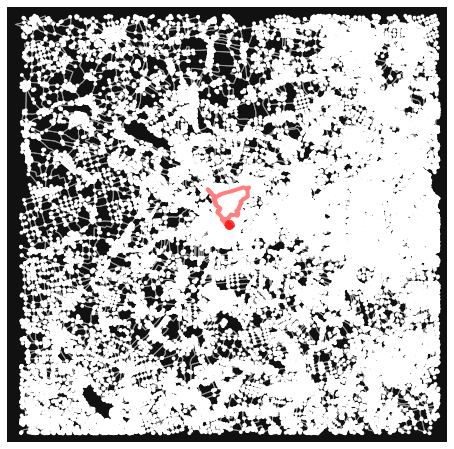

Total distance: 40795.84600000001


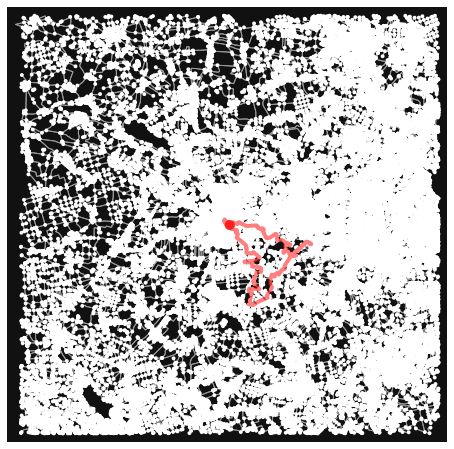

Total distance: 57574.42700000002


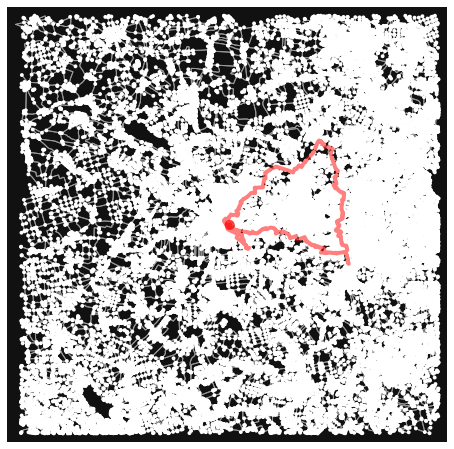

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
length = 20000
p1, l1 =  rf.make_route(length)
print(f"Total distance: {l1}")
rf.plot_graph(path=p1)

length = 40000
p2, l2 =  rf.make_route(length)
print(f"Total distance: {l2}")
rf.plot_graph(path=p2)

length = 60000
p3, l3 =  rf.make_route(length)
print(f"Total distance: {l3}")
rf.plot_graph(path=p3)

#  Rozkład rodzaju nawierzchni

In [54]:
def get_surface_distribution(path, G):
    score ={
            'Road_paths': 0,
             'Off_road_paths': 0,
             'Neutral_paths': 0,
             'Nan': 0
        }
    for i in range(0, len(path)-1, 1):
        u = path[i]
        v = path[i+1]
        d = G.edges[(u, v, 0)]
        if 'surface' in d.keys():
            surface = G.edges[(u, v, 0)]['surface']
        else:
            score["Nan"]+=1
            continue
        found = False
        for k, v in bike_types["Surfaces"].items():
            if found:
                break
            for el in v:
                if surface == el:
                    score[k]+=1
                    found = True
                    break
        if not found:
            score["Nan"]+=1
    return score

## Mountain

In [55]:
dist = 2000

start_t = time.time()
rf = RouteFinder(
    pos=(50.291100737108025, 18.680043199195698),
    dist = dist,
    bike_type = 'Mountain'
)
end_t = time.time()
print(f"Elapsed time for loading map of dist: {dist} was: {end_t-start_t:.2f}s")

a = rf.nearest_nodes(pos=(50.291100737108025, 18.680043199195698))

Elapsed time for loading map of dist: 2000 was: 2.82s


Total distance: 2025.687


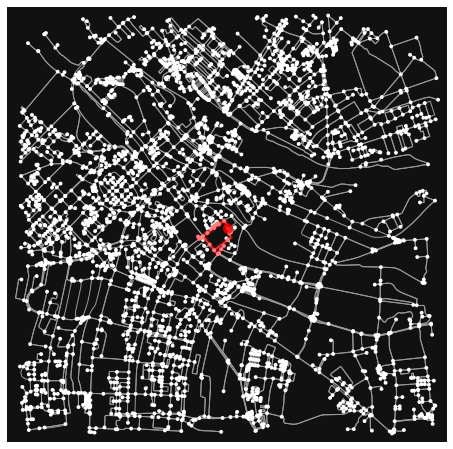

Total distance: 3852.7460000000005


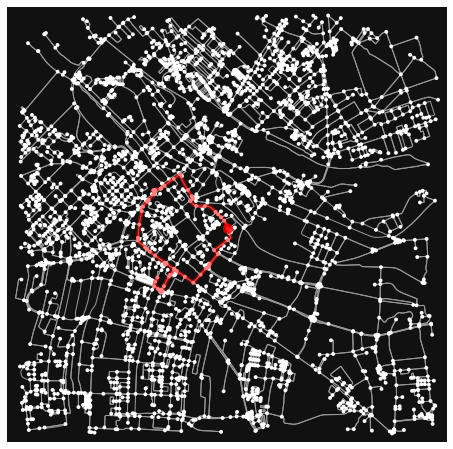

Total distance: 5703.397000000001


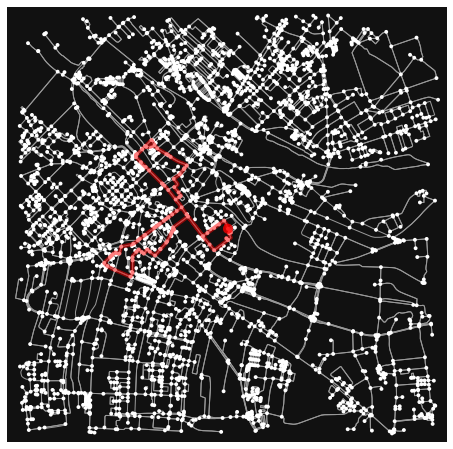

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [56]:
length = 2000
p1, l1 =  rf.make_route(length)
print(f"Total distance: {l1}")
rf.plot_graph(path=p1)

length = 4000
p2, l2 =  rf.make_route(length)
print(f"Total distance: {l2}")
rf.plot_graph(path=p2)

length = 6000
p3, l3 =  rf.make_route(length)
print(f"Total distance: {l3}")
rf.plot_graph(path=p3)

In [57]:
bike_types = rf.bike_types
G = rf.G

In [58]:
print(get_surface_distribution(p1, G))
print(get_surface_distribution(p2, G))
print(get_surface_distribution(p3, G))

{'Road_paths': 23, 'Off_road_paths': 0, 'Neutral_paths': 0, 'Nan': 20}
{'Road_paths': 71, 'Off_road_paths': 0, 'Neutral_paths': 0, 'Nan': 4}
{'Road_paths': 83, 'Off_road_paths': 0, 'Neutral_paths': 0, 'Nan': 10}


## Road

In [59]:
dist = 2000

start_t = time.time()
rf = RouteFinder(
    pos=(50.291100737108025, 18.680043199195698),
    dist = dist,
    bike_type = 'Road'
)
end_t = time.time()
print(f"Elapsed time for loading map of dist: {dist} was: {end_t-start_t:.2f}s")

a = rf.nearest_nodes(pos=(50.291100737108025, 18.680043199195698))

Elapsed time for loading map of dist: 2000 was: 2.86s


Total distance: 1975.5590000000004


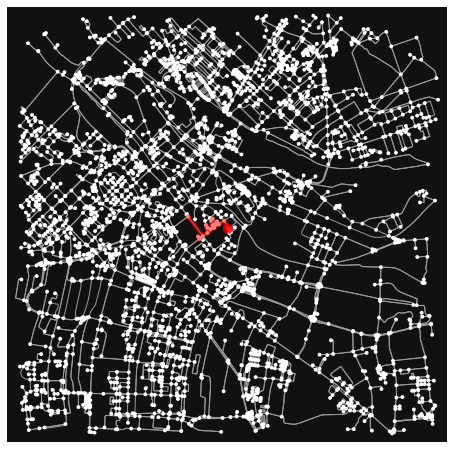

Total distance: 4096.926999999999


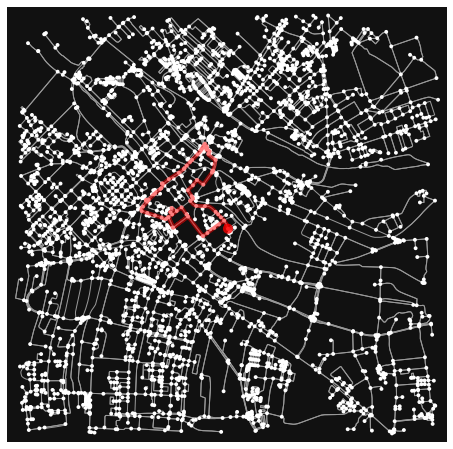

Total distance: 5948.406000000001


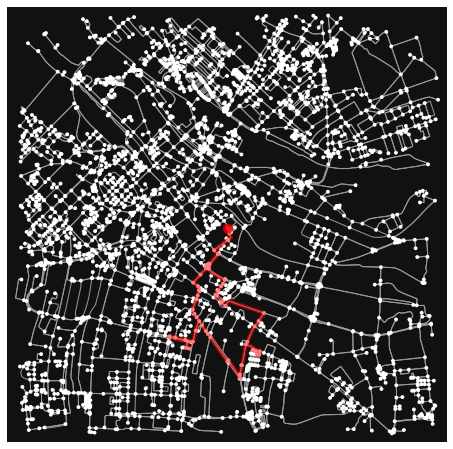

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [60]:
length = 2000
p1, l1 =  rf.make_route(length)
print(f"Total distance: {l1}")
rf.plot_graph(path=p1)

length = 4000
p2, l2 =  rf.make_route(length)
print(f"Total distance: {l2}")
rf.plot_graph(path=p2)

length = 6000
p3, l3 =  rf.make_route(length)
print(f"Total distance: {l3}")
rf.plot_graph(path=p3)

In [61]:
bike_types = rf.bike_types
G = rf.G

In [62]:
print(get_surface_distribution(p1, G))
print(get_surface_distribution(p2, G))
print(get_surface_distribution(p3, G))

{'Road_paths': 13, 'Off_road_paths': 0, 'Neutral_paths': 0, 'Nan': 24}
{'Road_paths': 61, 'Off_road_paths': 0, 'Neutral_paths': 0, 'Nan': 10}
{'Road_paths': 71, 'Off_road_paths': 2, 'Neutral_paths': 0, 'Nan': 15}
